### Problem Statement
     A bank aims to leverage its customer data to enhance decision-making processes by gaining insights into customer demographics, financial behaviors, and engagement trends. By understanding the characteristics and needs of different customer segments, the bank seeks to identify opportunities for improving customer retention, optimizing service offerings, and increasing customer satisfaction.


### Approach
    
     To achieve this, we are going to approach the analysis using the following steps
   - Properly Master The Business And Data
   - Clean And Explore Data For Analysis
   - Using Visualisations To Answer Questions Enabling Us Achieve Our Objective
   - Draw A Conclusion
   - Prepare A Summary


### Objective

    - Demographic Analysis

    - Customer Engagement Patterns

    - Financial Performance

    - Exited Customers Analysis

      
      


### Data Mastery

In [453]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

In [454]:
# Read in our dataset
customer_df = pd.read_csv('BankData/Customer_Info - Customer_Info.csv')
account_df = pd.read_csv('BankData/Account_Info - Account_Info.csv')

### Data Exploration

In [455]:
customer_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58
2,15619304,Onio,502,French,Female,42.0,8,€113931.57
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1


In [456]:
customer_df.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
9996,15569892,Johnstone,516,French,Male,35.0,10,€101699.77
9997,15584532,Liu,709,FRA,Female,36.0,7,€42085.58
9998,15682355,Sabbatini,772,Germany,Male,42.0,3,€92888.52
9999,15628319,Walker,792,French,Female,28.0,4,€38190.78
10000,15628319,Walker,792,French,Female,28.0,4,€38190.78


In [583]:
account_df.head()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,€0.0,1,Yes,2,Yes,1
1,15634602,€0.0,1,Yes,2,Yes,1
2,15647311,€83807.86,1,Yes,1,Yes,0
3,15619304,€159660.8,3,No,8,No,1
4,15701354,€0.0,2,No,1,No,0


In [584]:
account_df.tail()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
9997,15569892,€57369.61,1,Yes,10,Yes,0
9998,15584532,€0.0,1,Yes,7,Yes,1
9999,15682355,€75075.31,2,No,3,No,1
10000,15628319,€130142.79,1,No,4,No,0
10001,15628319,€130142.79,1,No,4,No,0


### Data Dictionary
   This ia a dictionary that interpretes each column
| Field                | Description                                                                                     |
|----------------------|-------------------------------------------------------------------------------------------------|
| **CustomerId**       | A unique identifier for each customer                                                           |
| **Surname**          | The customer's last name                                                                        |
| **CreditScore**      | A numerical value representing the customer's credit score                                      |
| **Geography**        | The country where the customer resides (France, Spain, or Germany)                              |
| **Gender**           | The customer's gender (Male or Female)                                                          |
| **Age**              | The customer's age                                                                              |
| **Tenure**           | The number of years the customer has been with the bank                                         |
| **Balance**          | The customer's account balance                                                                  |
| **Number Of Products** | The number of bank products the customer uses (e.g., savings account, credit card)            |
| **Has Credit Card**  | Whether the customer has a credit card (1 = yes, 0 = no)                                        |
| **IsActiveMember**   | Whether the customer is an active member (1 = yes, 0 = no)                                      |
| **EstimatedSalary**  | The estimated salary of the customer                                                            |
| **Exited**           | Whether the customer has churned (1 = yes, 0 = no)             |

yes, 0 = no)


In [585]:
# concatenating the data to make it a whole dataset using merge function
data_df = pd.merge(customer_df,account_df, on='CustomerId', how='outer')

data_df.head()

In [586]:
data_df.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
9999,15815628,Moysey,711,France,Female,37.0,8,€80215.2,€113899.92,1,No,8,No,0
10000,15815645,Akhtar,481,FRA,Male,37.0,8,€175082.2,€152303.66,2,Yes,8,Yes,0
10001,15815656,Hopkins,541,Germany,Female,39.0,9,€199808.1,€100116.67,1,Yes,9,Yes,1
10002,15815660,Mazzi,758,FRA,Female,34.0,1,€60728.89,€154139.45,1,Yes,1,Yes,0
10003,15815690,Akabueze,614,Spain,Female,40.0,3,€77789.01,€113348.5,1,Yes,3,Yes,0


In [587]:
data_df.info() # This gives us a clear view of our values. The column name,total rows,if column has a null value and their datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10004 non-null  int64  
 1   Surname          10001 non-null  object 
 2   CreditScore      10004 non-null  int64  
 3   Geography        10004 non-null  object 
 4   Gender           10004 non-null  object 
 5   Age              10001 non-null  float64
 6   Tenure_x         10004 non-null  int64  
 7   EstimatedSalary  10004 non-null  object 
 8   Balance          10004 non-null  object 
 9   NumOfProducts    10004 non-null  int64  
 10  HasCrCard        10004 non-null  object 
 11  Tenure_y         10004 non-null  int64  
 12  IsActiveMember   10004 non-null  object 
 13  Exited           10004 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 1.1+ MB


In [588]:
data_df.isnull().sum() # This shows the sum of each null values in a column

CustomerId         0
Surname            3
CreditScore        0
Geography          0
Gender             0
Age                3
Tenure_x           0
EstimatedSalary    0
Balance            0
NumOfProducts      0
HasCrCard          0
Tenure_y           0
IsActiveMember     0
Exited             0
dtype: int64

In [589]:
data_df.isnull().sum() / len(data_df) * 100 # This returns the significant sum of null values in percentage

CustomerId         0.000000
Surname            0.029988
CreditScore        0.000000
Geography          0.000000
Gender             0.000000
Age                0.029988
Tenure_x           0.000000
EstimatedSalary    0.000000
Balance            0.000000
NumOfProducts      0.000000
HasCrCard          0.000000
Tenure_y           0.000000
IsActiveMember     0.000000
Exited             0.000000
dtype: float64

In [590]:
data_df.columns # This returns all the columns headers in the dataset

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure_x', 'EstimatedSalary', 'Balance', 'NumOfProducts', 'HasCrCard',
       'Tenure_y', 'IsActiveMember', 'Exited'],
      dtype='object')

In [591]:
data_df.shape # This shows how many rows and column we have in our dataset

(10004, 14)

In [592]:
data_df.duplicated().sum() # This returns the sum of duplicated rows 

4

In [593]:
# removing duplicates
data_df = data_df.drop_duplicates(subset=['CustomerId'])

In [594]:
data_df.duplicated().sum()

0

In [595]:
data_df.describe() # This returns the statistics of the data

,CustomerId,CreditScore,Age,Tenure_x,NumOfProducts,Tenure_y,Exited
count,1.000000e+04,10000.000000,9997.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.922077,5.012800,1.530200,5.012800,0.203700
std,7.193619e+04,96.653299,10.489072,2.892174,0.581654,2.892174,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,1.000000,0.000000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,1.000000,3.000000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,1.000000,5.000000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,2.000000,7.000000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,4.000000,10.000000,1.000000


## Observations
- We noticed surname and age has null values
- We need to rename Geography for easy understanding and also FRA and French to France
- Remove characters in Balance and Estimated Salary
- We would change the datatypes for Age, Balance and Estimated Salary
- We have 2 tenure columns, 1 will be dropped 

### Data Cleaning

In [596]:
# Before we alter our data we must make a copy
data_copy = data_df.copy()

In [597]:
# removing our rows with null values
data_df.dropna(subset=['Surname', 'Age'], axis=0, inplace=True)

In [598]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9997 entries, 0 to 10003
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       9997 non-null   int64  
 1   Surname          9997 non-null   object 
 2   CreditScore      9997 non-null   int64  
 3   Geography        9997 non-null   object 
 4   Gender           9997 non-null   object 
 5   Age              9997 non-null   float64
 6   Tenure_x         9997 non-null   int64  
 7   EstimatedSalary  9997 non-null   object 
 8   Balance          9997 non-null   object 
 9   NumOfProducts    9997 non-null   int64  
 10  HasCrCard        9997 non-null   object 
 11  Tenure_y         9997 non-null   int64  
 12  IsActiveMember   9997 non-null   object 
 13  Exited           9997 non-null   int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 1.1+ MB


In [599]:
# Renaming our column geography to location
data_df.rename(columns = {'Geography' : 'Location'}, inplace = True)

In [600]:
data_df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Location', 'Gender', 'Age',
       'Tenure_x', 'EstimatedSalary', 'Balance', 'NumOfProducts', 'HasCrCard',
       'Tenure_y', 'IsActiveMember', 'Exited'],
      dtype='object')

In [601]:
data_df['Location'] = data_df['Location'].replace({'FRA' : 'France'})

In [602]:
data_df['Location'] = data_df['Location'].replace({'French' : 'France'})

In [603]:
data_df.head(20)

,CustomerId,Surname,CreditScore,Location,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15565701,Ferri,698,Spain,Female,39.0,9,€90212.38,€161993.89,1,No,9,No,0
1,15565706,Akobundu,612,Spain,Male,35.0,1,€83256.26,€0.0,1,Yes,1,Yes,1
2,15565714,Cattaneo,601,France,Male,47.0,1,€96517.97,€64430.06,2,Yes,1,Yes,0
3,15565779,Kent,627,Germany,Female,30.0,6,€188258.49,€57809.32,1,No,6,No,0
4,15565796,Docherty,745,Germany,Male,48.0,10,€74510.65,€96048.55,1,No,10,No,0
5,15565806,Toosey,532,France,Male,38.0,9,€30583.95,€0.0,2,No,9,No,0
6,15565878,Bates,631,Spain,Male,29.0,3,€197963.46,€0.0,2,Yes,3,Yes,0
7,15565879,Riley,845,France,Female,28.0,9,€56185.98,€0.0,2,Yes,9,Yes,0
8,15565891,Dipietro,709,France,Male,39.0,8,€56214.09,€0.0,2,No,8,No,0
9,15565996,Arnold,653,France,Male,44.0,8,€154639.72,€0.0,2,Yes,8,Yes,0


In [604]:
# Removing the currency symbol to enable us change the datatype to float
data_df['Balance'] = data_df['Balance'].str.replace("€","")

In [605]:
data_df['EstimatedSalary'] = data_df['EstimatedSalary'].str.replace("€","")

In [606]:
data_df.head(20)

,CustomerId,Surname,CreditScore,Location,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15565701,Ferri,698,Spain,Female,39.0,9,90212.38,161993.89,1,No,9,No,0
1,15565706,Akobundu,612,Spain,Male,35.0,1,83256.26,0.0,1,Yes,1,Yes,1
2,15565714,Cattaneo,601,France,Male,47.0,1,96517.97,64430.06,2,Yes,1,Yes,0
3,15565779,Kent,627,Germany,Female,30.0,6,188258.49,57809.32,1,No,6,No,0
4,15565796,Docherty,745,Germany,Male,48.0,10,74510.65,96048.55,1,No,10,No,0
5,15565806,Toosey,532,France,Male,38.0,9,30583.95,0.0,2,No,9,No,0
6,15565878,Bates,631,Spain,Male,29.0,3,197963.46,0.0,2,Yes,3,Yes,0
7,15565879,Riley,845,France,Female,28.0,9,56185.98,0.0,2,Yes,9,Yes,0
8,15565891,Dipietro,709,France,Male,39.0,8,56214.09,0.0,2,No,8,No,0
9,15565996,Arnold,653,France,Male,44.0,8,154639.72,0.0,2,Yes,8,Yes,0


In [607]:
data_df.tail(20)

,CustomerId,Surname,CreditScore,Location,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
9984,15815259,Fang,835,France,Female,56.0,2,39820.13,0.0,2,Yes,2,Yes,0
9985,15815271,Ritchie,755,Germany,Male,43.0,6,16929.41,165048.5,3,No,6,No,1
9986,15815295,John,662,France,Female,38.0,2,120259.41,96479.81,1,No,2,No,0
9987,15815316,Kennedy,644,France,Male,50.0,9,196371.13,76817.0,4,No,9,No,1
9988,15815364,Ashley,736,Spain,Female,28.0,2,117431.1,0.0,2,Yes,2,Yes,0
9989,15815420,McDaniels,808,Spain,Male,47.0,8,74028.36,139196.0,1,Yes,8,Yes,0
9990,15815428,Biryukova,823,France,Male,34.0,3,9217.92,105057.33,1,No,3,No,0
9991,15815443,Lo,527,Spain,Female,46.0,10,54947.51,131414.76,1,No,10,No,0
9992,15815490,Cocci,670,Germany,Male,40.0,2,177028.0,164948.98,3,No,2,No,1
9993,15815530,Chin,612,France,Female,42.0,10,149682.78,75497.51,1,No,10,No,0


In [608]:
# Converting our datatype using the astype function
data_df['Age'] = data_df['Age'].astype('int')
data_df['Balance'] = data_df['Balance'].astype('float')
data_df['EstimatedSalary'] = data_df['EstimatedSalary'].astype('float')

In [609]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9997 entries, 0 to 10003
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       9997 non-null   int64  
 1   Surname          9997 non-null   object 
 2   CreditScore      9997 non-null   int64  
 3   Location         9997 non-null   object 
 4   Gender           9997 non-null   object 
 5   Age              9997 non-null   int32  
 6   Tenure_x         9997 non-null   int64  
 7   EstimatedSalary  9997 non-null   float64
 8   Balance          9997 non-null   float64
 9   NumOfProducts    9997 non-null   int64  
 10  HasCrCard        9997 non-null   object 
 11  Tenure_y         9997 non-null   int64  
 12  IsActiveMember   9997 non-null   object 
 13  Exited           9997 non-null   int64  
dtypes: float64(2), int32(1), int64(6), object(5)
memory usage: 1.1+ MB


In [610]:
# Droping one of the tenure columns
data_df.drop('Tenure_y', axis=1, inplace=True)

In [611]:
data_df.head(50)

,CustomerId,Surname,CreditScore,Location,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15565701,Ferri,698,Spain,Female,39,9,90212.38,161993.89,1,No,No,0
1,15565706,Akobundu,612,Spain,Male,35,1,83256.26,0.00,1,Yes,Yes,1
2,15565714,Cattaneo,601,France,Male,47,1,96517.97,64430.06,2,Yes,Yes,0
3,15565779,Kent,627,Germany,Female,30,6,188258.49,57809.32,1,No,No,0
4,15565796,Docherty,745,Germany,Male,48,10,74510.65,96048.55,1,No,No,0
5,15565806,Toosey,532,France,Male,38,9,30583.95,0.00,2,No,No,0
6,15565878,Bates,631,Spain,Male,29,3,197963.46,0.00,2,Yes,Yes,0
7,15565879,Riley,845,France,Female,28,9,56185.98,0.00,2,Yes,Yes,0
8,15565891,Dipietro,709,France,Male,39,8,56214.09,0.00,2,No,No,0
9,15565996,Arnold,653,France,Male,44,8,154639.72,0.00,2,Yes,Yes,0


In [612]:
# Renaming the tenure column
data_df.rename(columns = {'Tenure_x' : 'Tenure'}, inplace = True)

In [613]:
data_df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Location', 'Gender', 'Age',
       'Tenure', 'EstimatedSalary', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited'],
      dtype='object')

In [614]:
# Saving and renaming our cleaned data
data_df.to_csv('CleanedBankData')

### Data Analysis


In [615]:
# In order to visualize the count of category columns we need to get all the coulmns
cat_columns = [i for i in data_df.select_dtypes('object')]

In [616]:
# These are all the categorical columns in our dataset
cat_columns

['Surname', 'Location', 'Gender', 'HasCrCard', 'IsActiveMember']

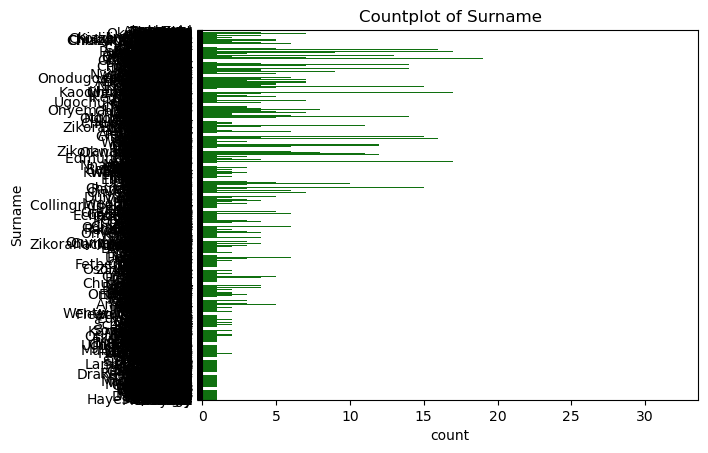

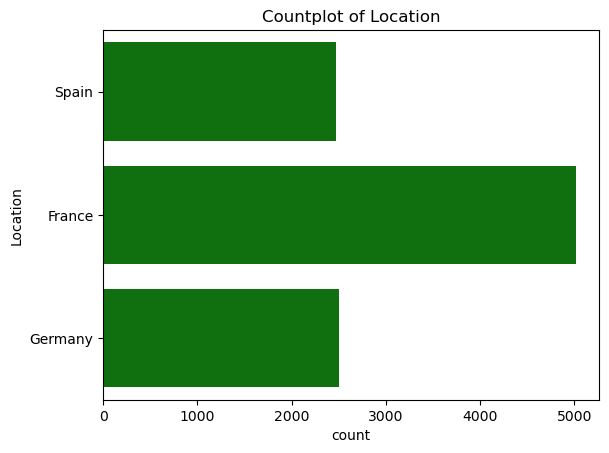

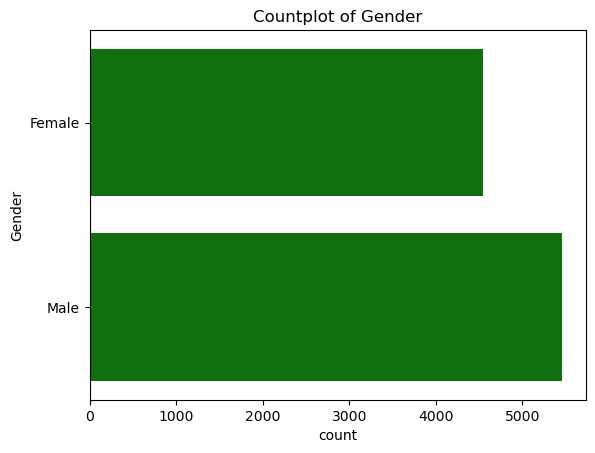

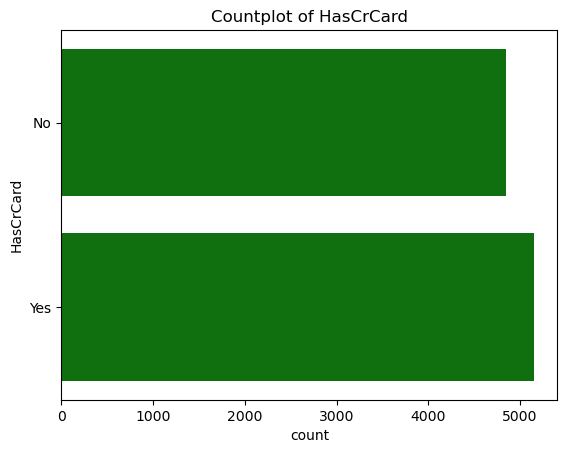

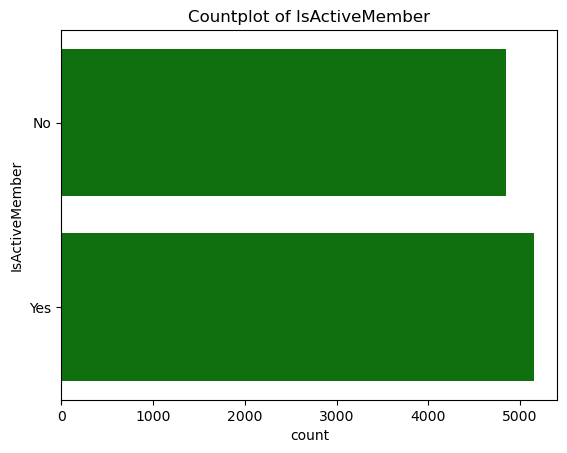

In [617]:
# Using the categorical column to plot a seaborn count plot
for col in cat_columns:
    sb.countplot(y=col,data=data_df, color= 'Green')
    plt.title(f'Countplot of {col}')
    plt.show()

#### `Observations`
- `Courtesy of the huge data, the name plot is compacted`
- `France has the highest count in location`
-  `In gender count male surpasses the female`
-  `Most of the customers have credit cards`
-  `Most customers are active`

In [618]:
# Would love to visualize our numerical columns 
num_columns = [i for i in data_df.select_dtypes('int','float')]

In [619]:
# This are the numerical columns in our dataset
num_columns

['CustomerId', 'CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'Exited']

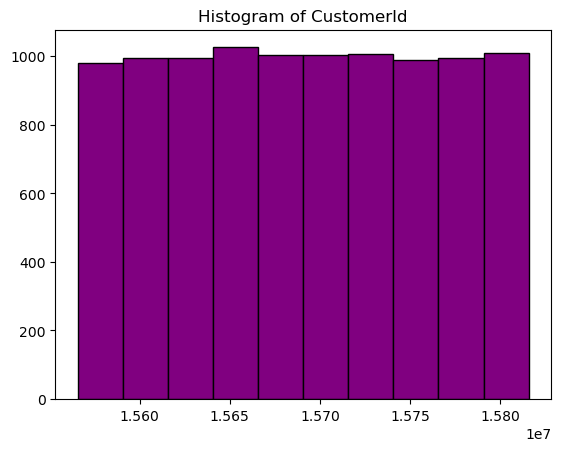

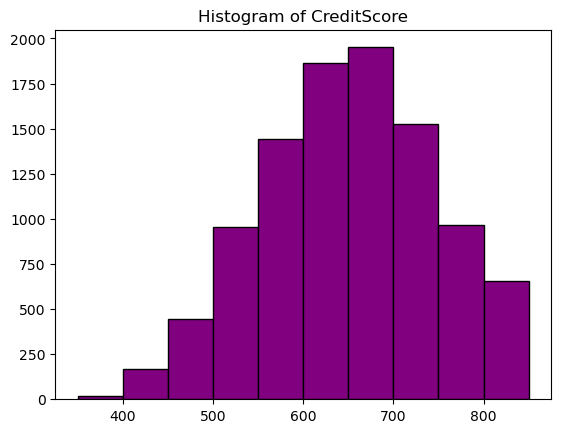

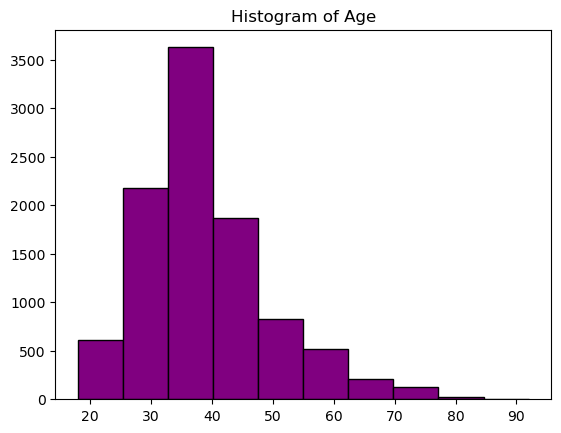

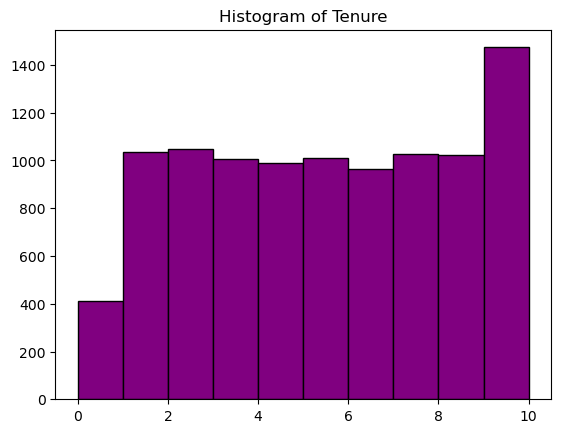

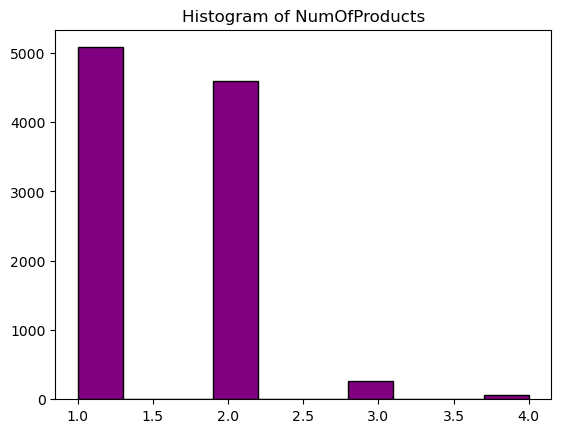

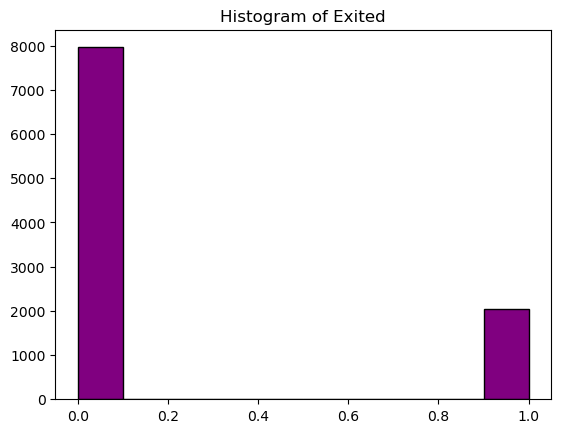

In [620]:
# Plotting our historical graph to visual each columns 
for col in num_columns:
    plt.hist(data_df[col], color= 'purple', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.show()
    

#### `Observations`
- `CustomerId is showing a close margin distribution`
- `The highest in credit score is within 650 to 700`
- `The highest age range is 30 to 40`
- `The longest tenure is 9 to 10`
- `Age, Exited, NumofProducts and Tenure show a distribution that is indicating there is an outliers` 

In [621]:
## Helper functions

def plot_pie(data, labels, title):
    plt.pie(data, labels=labels,autopct='%.0f%%')
    plt.title(f'{title}')
    plt.show()


def get_bar_plot(x, y, xlabel, ylabel, color):
    plt.figure(figsize=(10, 6))
    plt.bar(x, y, color=color, edgecolor='black')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.title(f'Plot of {ylabel} against {xlabel}')  
    plt.show()


def get_line_chart(x, y, xlabel, ylabel, data, color='blue', estimator=sum):
    sb.lineplot(x=x, y=y, marker='o', dashes=True, data=data, estimator=estimator, color=color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f'Plot of {ylabel} against {xlabel}')
    plt.show



#### Demographic Analysis

1.    Analyze the distribution of customers based on geography, gender, and age

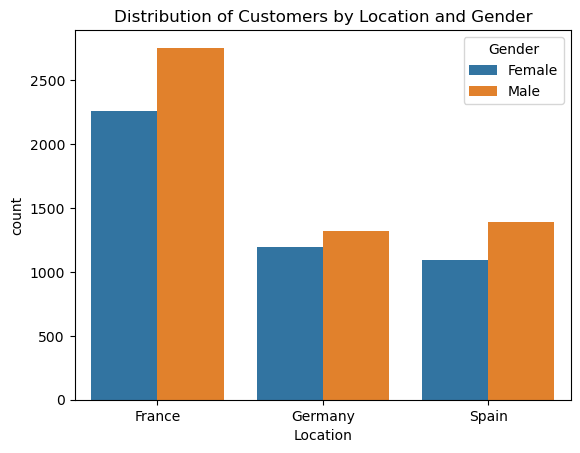

In [622]:
# Plot count of customers by geography and gender
sb.countplot(data=data_df, x="Location", hue="Gender", order = data_df['Location'].value_counts().index)
plt.title("Distribution of Customers by Location and Gender")
plt.show()

#### `Results`
- `Germany have the most female customers, while Spain ranked high in the male category`

- `Least in male is Germany`

- `Least in female category is Spain`

- `Most of the customers are male gender`

- Distribution of customers by location

In [623]:
# Grouping our customer by location
cust_dist_by_location = data_df.groupby('Location')[['CustomerId']].count().sort_values(by='CustomerId', ascending=False)
cust_dist_by_location

,CustomerId
Location,
France,5013
Germany,2508
Spain,2476


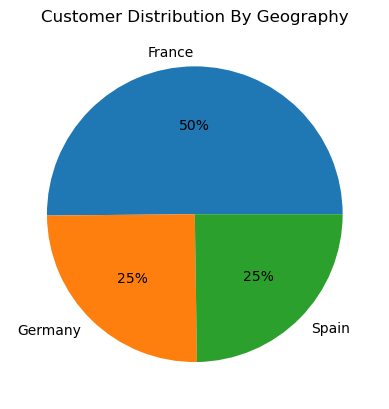

In [624]:
#Plotting the result
plot_pie(cust_dist_by_location['CustomerId'], cust_dist_by_location.index, 'Customer Distribution By Geography')

- `France has 50% of the customer population`
- `Germany and Spain have equal customer population`

- Distribution of customers by gender

In [625]:
# customer distribution by gender
cust_dist_by_gender = data_df.groupby('Gender')[['CustomerId']].count().sort_values(by='CustomerId', ascending=False)
cust_dist_by_gender

,CustomerId
Gender,
Male,5456
Female,4541


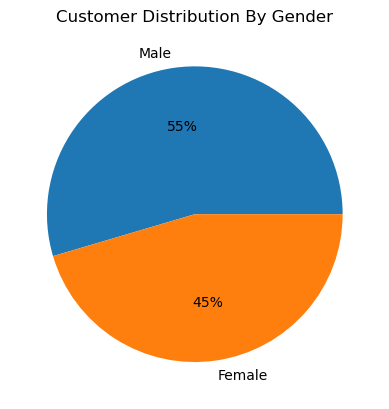

In [626]:
# Plotting the result
plot_pie(cust_dist_by_gender['CustomerId'], cust_dist_by_gender.index, 'Customer Distribution By Gender')

- `There are more male customers than female`

- Customer distribution by age

In [627]:
# Distributing our customers age into groups, to enable us get the highest age range
# Define age bins and labels
bins = [0, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 100]
labels = ['0-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66-70', '71+']

# Create an 'Age Group' column based on age bins
data_df['Age Group'] = pd.cut(data_df['Age'], bins=bins, labels=labels, right=False)

# Group by 'Age Group' and count the number of customers in each group
age_distribution = data_df.groupby('Age Group')[['CustomerId']].count()

# Display the distribution
age_distribution


,CustomerId
Age Group,
0-20,49
21-25,408
26-30,1184
31-35,2037
36-40,2307
41-45,1672
46-50,945
51-55,513
56-60,356


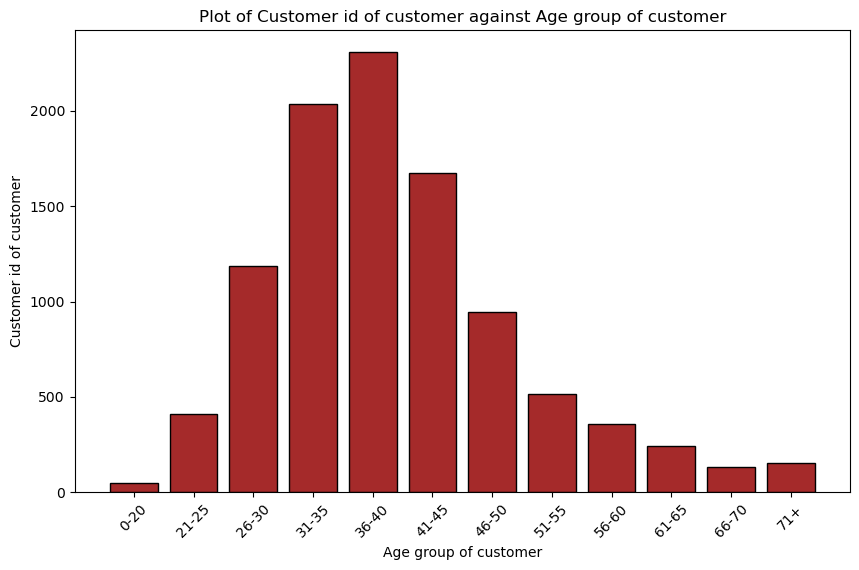

In [628]:
# plotting a distribution graph to see our highest age range
get_bar_plot(age_distribution.index, age_distribution['CustomerId'], 'Age group of customer', 'Customer id of customer', 'brown')

### `Results`
- `The most appearing age range of our customer are 36 to 40`

- `The least is below 20`

2.  Identify any demographic segments (e.g., by geography or gender) that have a significantly different credit score, balance, or other financial metrics.    


In [629]:
# Group by Geography, then calculate average CreditScore and Balance
demographic_analysis = data_df.groupby('Location')[['CreditScore']].count()

# Display the result
demographic_analysis

,CreditScore
Location,
France,5013
Germany,2508
Spain,2476


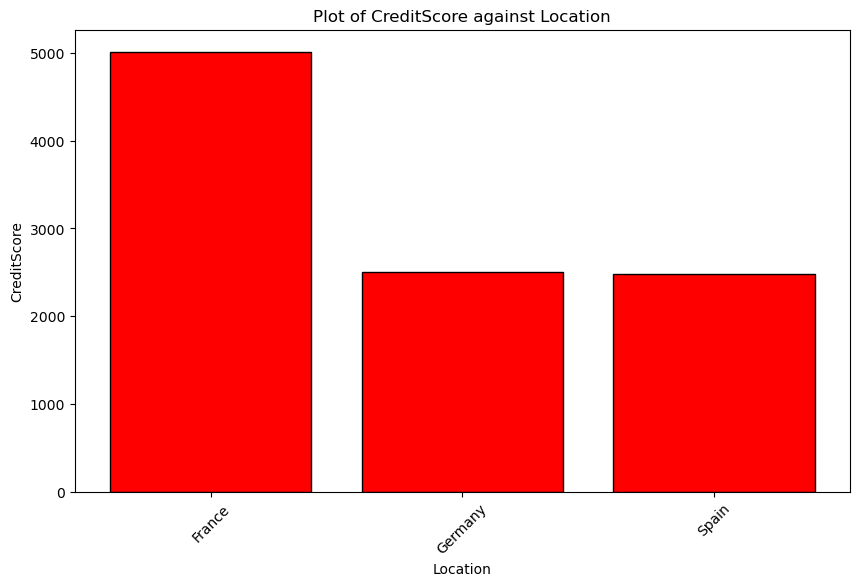

In [630]:
# Plotting our result
get_bar_plot(demographic_analysis.index, demographic_analysis['CreditScore'], 'Location', 'CreditScore', 'red')

- `France has the highest count of credit score` 
- `Spain has the least`

#### Customer Engagement Patterns

2. Analyze the impact of tenure on customer behavior, especially focusing on long-term customer patterns (e.g., do longer-tenured customers tend to hold more products or have higher balances?).

1. Value count of customers with credit card and active members

In [631]:
data_df['HasCrCard'].value_counts()

HasCrCard
Yes    5149
No     4848
Name: count, dtype: int64

In [632]:
data_df['IsActiveMember'].value_counts()

IsActiveMember
Yes    5149
No     4848
Name: count, dtype: int64

- `Customers with credit card are also active members`

In [633]:
# Define tenure groups based on years

def categorize_tenure(year):
    if year <= 2:
        return 'New Customers (0-2 years)'
    elif 2 < year <= 6:
        return 'Moderate Tenure (2-6 years)'
    else:
        return 'Loyal Customers (6+ years)'

# Apply tenure categorization
data_df['Tenure_Category'] = data_df['Tenure'].apply(categorize_tenure)

In [634]:
# Grouping by tenure and counting the customers with credit in each tenure
result = data_df.groupby('Tenure_Category')[['HasCrCard']].count()
result

,HasCrCard
Tenure_Category,
Loyal Customers (6+ years),3527
Moderate Tenure (2-6 years),3975
New Customers (0-2 years),2495


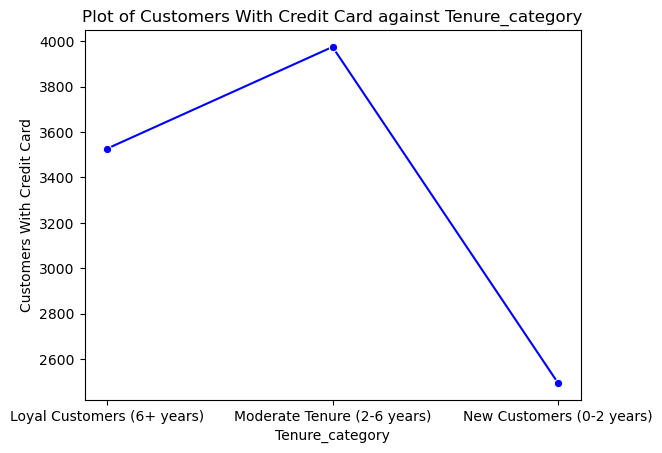

In [635]:
get_line_chart(result.index, 'HasCrCard', 'Tenure_category', 'Customers With Credit Card', result)

In [636]:
# Categorising the has credit card and active mean in order to get the average for each tenure
def categorize_HasCrCard(value):
    if value == 'Yes':
        return '1'
    else:
        return '0'
    
data_df['HasCreditCard'] = data_df['HasCrCard'].apply(categorize_HasCrCard)


In [637]:
def categorize_Is_ActiveMember(value):
    if value == 'Yes':
        return '1'
    else:
        return '0'
    
data_df['IsActivemember'] = data_df['IsActiveMember'].apply(categorize_Is_ActiveMember)


In [638]:
data_df.head(20)

,CustomerId,Surname,CreditScore,Location,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Age Group,Tenure_Category,HasCreditCard,IsActivemember
0,15565701,Ferri,698,Spain,Female,39,9,90212.38,161993.89,1,No,No,0,36-40,Loyal Customers (6+ years),0,0
1,15565706,Akobundu,612,Spain,Male,35,1,83256.26,0.00,1,Yes,Yes,1,36-40,New Customers (0-2 years),1,1
2,15565714,Cattaneo,601,France,Male,47,1,96517.97,64430.06,2,Yes,Yes,0,46-50,New Customers (0-2 years),1,1
3,15565779,Kent,627,Germany,Female,30,6,188258.49,57809.32,1,No,No,0,31-35,Moderate Tenure (2-6 years),0,0
4,15565796,Docherty,745,Germany,Male,48,10,74510.65,96048.55,1,No,No,0,46-50,Loyal Customers (6+ years),0,0
5,15565806,Toosey,532,France,Male,38,9,30583.95,0.00,2,No,No,0,36-40,Loyal Customers (6+ years),0,0
6,15565878,Bates,631,Spain,Male,29,3,197963.46,0.00,2,Yes,Yes,0,26-30,Moderate Tenure (2-6 years),1,1
7,15565879,Riley,845,France,Female,28,9,56185.98,0.00,2,Yes,Yes,0,26-30,Loyal Customers (6+ years),1,1
8,15565891,Dipietro,709,France,Male,39,8,56214.09,0.00,2,No,No,0,36-40,Loyal Customers (6+ years),0,0
9,15565996,Arnold,653,France,Male,44,8,154639.72,0.00,2,Yes,Yes,0,41-45,Loyal Customers (6+ years),1,1


In [639]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9997 entries, 0 to 10003
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CustomerId       9997 non-null   int64   
 1   Surname          9997 non-null   object  
 2   CreditScore      9997 non-null   int64   
 3   Location         9997 non-null   object  
 4   Gender           9997 non-null   object  
 5   Age              9997 non-null   int32   
 6   Tenure           9997 non-null   int64   
 7   EstimatedSalary  9997 non-null   float64 
 8   Balance          9997 non-null   float64 
 9   NumOfProducts    9997 non-null   int64   
 10  HasCrCard        9997 non-null   object  
 11  IsActiveMember   9997 non-null   object  
 12  Exited           9997 non-null   int64   
 13  Age Group        9997 non-null   category
 14  Tenure_Category  9997 non-null   object  
 15  HasCreditCard    9997 non-null   object  
 16  IsActivemember   9997 non-null   object  
dtyp

In [640]:
data_df['HasCreditCard'] = data_df['HasCreditCard'].astype('int')
data_df['IsActivemember'] = data_df['IsActivemember'].astype('int')

In [641]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9997 entries, 0 to 10003
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CustomerId       9997 non-null   int64   
 1   Surname          9997 non-null   object  
 2   CreditScore      9997 non-null   int64   
 3   Location         9997 non-null   object  
 4   Gender           9997 non-null   object  
 5   Age              9997 non-null   int32   
 6   Tenure           9997 non-null   int64   
 7   EstimatedSalary  9997 non-null   float64 
 8   Balance          9997 non-null   float64 
 9   NumOfProducts    9997 non-null   int64   
 10  HasCrCard        9997 non-null   object  
 11  IsActiveMember   9997 non-null   object  
 12  Exited           9997 non-null   int64   
 13  Age Group        9997 non-null   category
 14  Tenure_Category  9997 non-null   object  
 15  HasCreditCard    9997 non-null   int32   
 16  IsActivemember   9997 non-null   int32   
dtyp

2. Tenure engagement by customer Average no of products

In [642]:

# Group by Tenure and calculate average engagement metrics
tenure_engagement = data_df.groupby('Tenure')[['NumOfProducts', 'HasCreditCard']].mean()

# Display the result
tenure_engagement


,NumOfProducts,HasCreditCard
Tenure,,
0,1.443099,0.530266
1,1.489855,0.549758
2,1.590258,0.533906
3,1.533730,0.518849
4,1.516684,0.505561
5,1.554348,0.500000
6,1.519669,0.516563
7,1.530156,0.520428
8,1.522927,0.506341


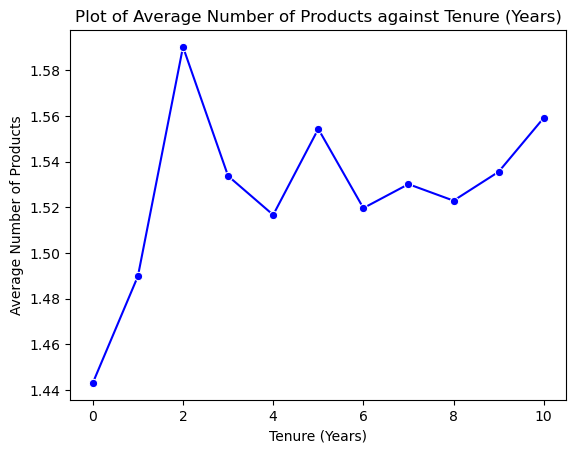

In [643]:
# Plot the results
get_line_chart(tenure_engagement.index, tenure_engagement['NumOfProducts'], 'Tenure (Years)', 'Average Number of Products', tenure_engagement)

In [644]:
# tenure engagement using the tenure category
tenure_engagement = data_df.groupby('Tenure_Category')[['NumOfProducts', 'HasCreditCard']].mean()

# Display the result
tenure_engagement


,NumOfProducts,HasCreditCard
Tenure_Category,,
Loyal Customers (6+ years),1.533598,0.502977
Moderate Tenure (2-6 years),1.531321,0.510189
New Customers (0-2 years),1.524248,0.539880


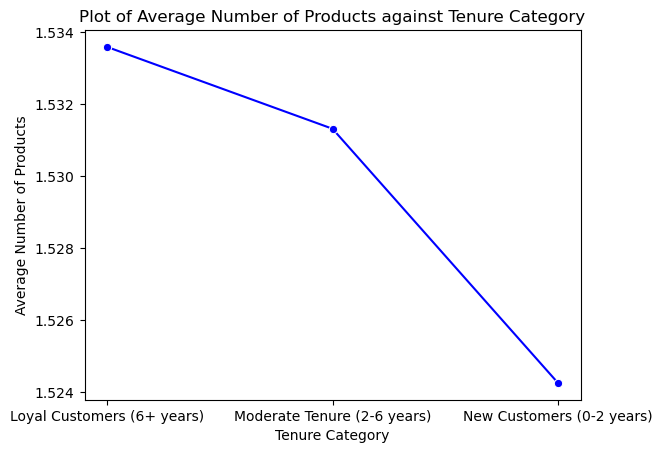

In [645]:
get_line_chart(tenure_engagement.index, tenure_engagement['NumOfProducts'], 'Tenure Category', 'Average Number of Products', tenure_engagement)

- `There is a peak in the no of product in the longer tenure`
- ` Customers with long tenure has a good no of product`

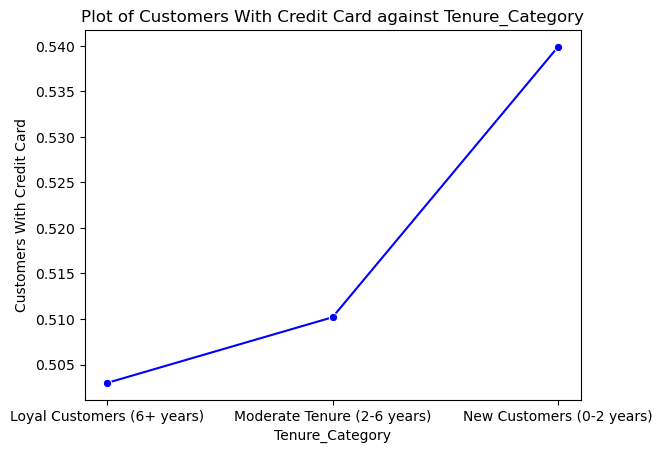

In [646]:
get_line_chart(tenure_engagement.index, tenure_engagement['HasCreditCard'], 'Tenure_Category', 'Customers With Credit Card', tenure_engagement)

- `New customers are issued credit cards at the opening of an account after which they tend not to renew`

3. Tenure analysis by customer average number of products and balance

In [647]:
# Group by tenure and calculate average values
tenure_analysis = data_df.groupby('Tenure').agg({
    'NumOfProducts': 'mean',
    'Balance': 'mean'
})

# Display the result
tenure_analysis

,NumOfProducts,Balance
Tenure,,
0,1.443099,79878.910630
1,1.489855,78555.384222
2,1.590258,76913.016753
3,1.533730,77604.883919
4,1.516684,74059.394065
5,1.554348,76444.280860
6,1.519669,74356.541522
7,1.530156,75551.634426
8,1.522927,77936.598254


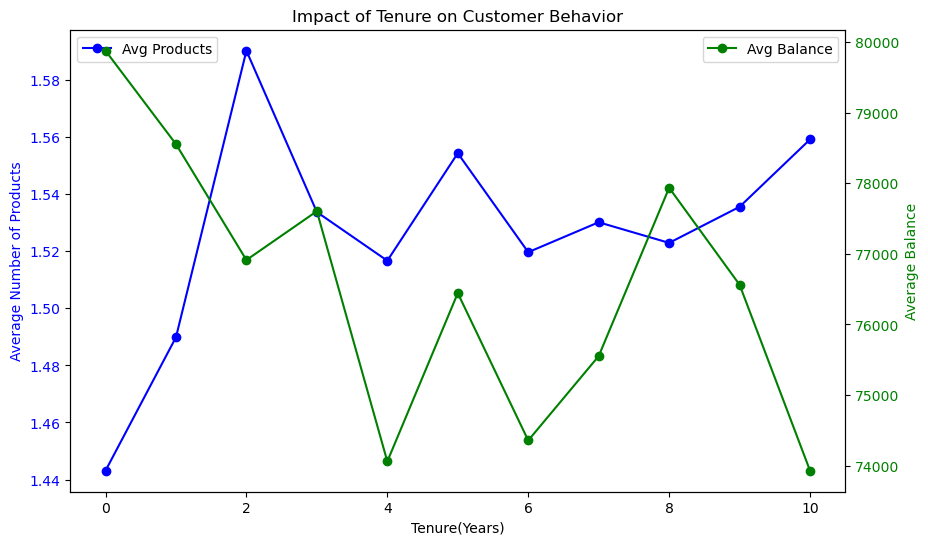

In [648]:
# Plotting the impact of tenure on customer behavior
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot for Number of Products by Tenure
ax1.set_xlabel('Tenure(Years)')
ax1.set_ylabel('Average Number of Products', color='blue')
ax1.plot(tenure_analysis.index, tenure_analysis['NumOfProducts'], marker='o', color='blue', label="Avg Products")
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis to plot Balance
ax2 = ax1.twinx()
ax2.set_ylabel('Average Balance', color='green')
ax2.plot(tenure_analysis.index, tenure_analysis['Balance'], marker='o', color='green', label="Avg Balance")
ax2.tick_params(axis='y', labelcolor='green')

# Titles and Legends
plt.title('Impact of Tenure on Customer Behavior')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


- `The average product plot suggests that longer-tenured customers are likely more engaged or have more trust for the bank.`

-  `The average balance plot IndicateS that longer-tenured customers do not tend to retain more funds` 

#### Financial Performance

   Explore credit score distribution and identify which customer segments (e.g., age, gender, geography) tend to have higher or lower credit scores.


In [649]:
# Average CreditScore distribution by gender for each customer
creditscore_by_gender = data_df.groupby('Gender')[['CreditScore']].mean().sort_values(by='CreditScore', ascending=False)
creditscore_by_gender

,CreditScore
Gender,
Female,650.873156
Male,650.272544


- `The average creditscore for each customer in the male and female category are equal`

In [650]:
# creditscore distribution by gender
creditscore_by_genders = data_df.groupby('Gender')[['CreditScore']].sum().sort_values(by='CreditScore', ascending=False)
creditscore_by_genders

,CreditScore
Gender,
Male,3547887
Female,2955615


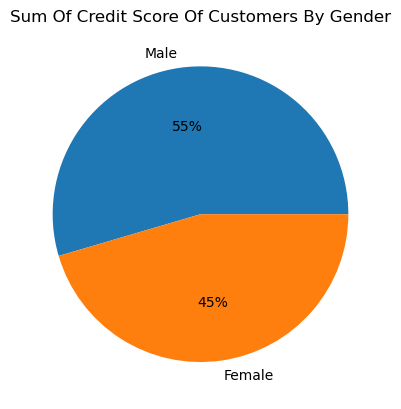

In [651]:
plot_pie(creditscore_by_genders['CreditScore'], creditscore_by_genders.index, 'Sum Of Credit Score Of Customers By Gender')

- `The male gender has higher credit scores`

- `The female customer has the lowest credit scores`

In [652]:
# Average Creditscore distribution by location for each customer
creditscore_by_location = data_df.groupby('Location')[['CreditScore']].mean().sort_values(by='CreditScore', ascending=False)
creditscore_by_location

,CreditScore
Location,
Germany,651.484450
Spain,651.324717
France,649.690604


- `France has lowest average creditscore for each customer`

- `Germany, Spain are the highest with little or no margin`

In [653]:
# creditscore distribution by location
creditscore_by_locations = data_df.groupby('Location')[['CreditScore']].count().sort_values(by='CreditScore', ascending=False)
creditscore_by_locations

,CreditScore
Location,
France,5013
Germany,2508
Spain,2476


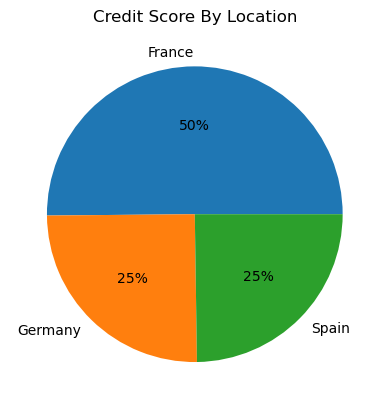

In [674]:
plt.pie(creditscore_by_locations['CreditScore'], labels=creditscore_by_locations.index,autopct='%.0f%%')
plt.title('Credit Score By Location')
plt.show()

-  `France covers 50% of the customer creditscore` 

Credit score distribution by age

<Figure size 2000x1000 with 0 Axes>

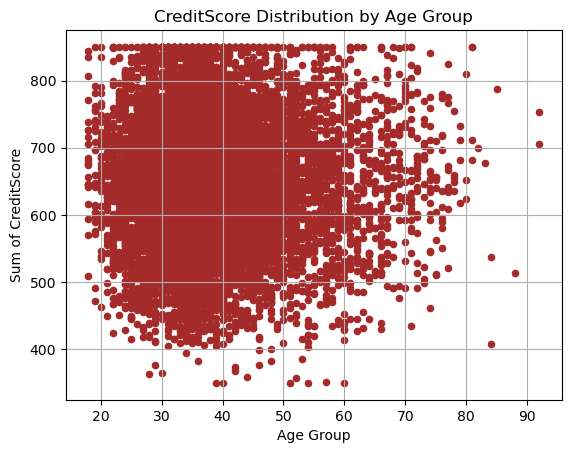

In [655]:
# Creditscore distribution by age group
plt.figure(figsize=(20,10))
data_df.plot('Age', 'CreditScore', kind='scatter',color='brown', grid=True)
plt.title('CreditScore Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Sum of CreditScore')
plt.show()

- `The lesser in age the more credit score`
- `The older age has less credit score`

2. Analyze customer balance and estimated salary patterns and compare them across different demographic groups

Customer distribution by balance

<Figure size 1000x3000 with 0 Axes>

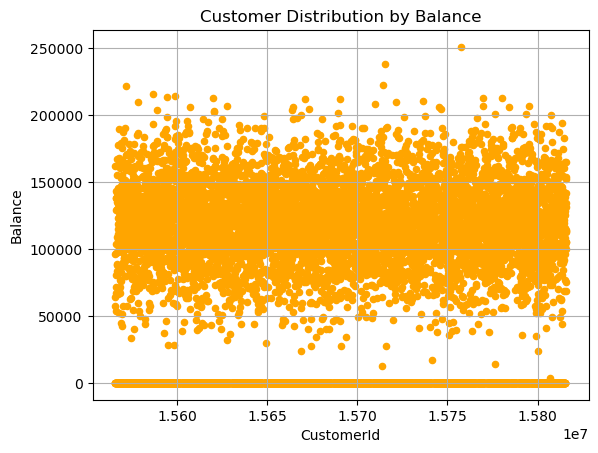

In [656]:
# Customer distribution by balance
plt.figure(figsize=(10,30))
data_df.plot('CustomerId', 'Balance', kind='scatter',color='orange', grid=True)
plt.title('Customer Distribution by Balance')
plt.xlabel('CustomerId')
plt.ylabel('Balance')
plt.show()

- `The customers with high balance are few`
- `Just one customer has above 250000 in balance`

Demography analysis of customers balance and estimated salary by age and gender

In [657]:
# Group by demographics (Gender and AgeGroup) and calculate average Balance and EstimatedSalary
demographic_analysis = data_df.groupby(['Gender', 'Age Group']).agg({
    'Balance': 'mean',
    'EstimatedSalary': 'mean'
})
# Display the result
demographic_analysis


Balance  EstimatedSalary
Gender Age Group                               
Female 0-20       72802.849231     98418.840000
       21-25      75707.073105    102513.514947
       26-30      72838.304369     99588.792176
       31-35      71478.433716    103839.212144
       36-40      76158.019674     95267.992226
       41-45      75875.873768    103563.743043
       46-50      78493.891848    106429.810698
       51-55      83629.593559     97942.114449
       56-60      82038.816378     94195.413351
       61-65      89000.274071     94113.727168
       66-70      68506.652692    112833.939038
       71+        62255.572632     95760.053421
Male   0-20       74968.393889     89767.454444
       21-25      72469.837339    106314.386743
       26-30      74205.615604    100256.224364
       31-35      75950.997391     97429.046077
       36-40      75874.977886     98794.508657
       41-45      79155.204524    101747.383790
       46-50      81293.204476    104026.290895
       51-55      84114.193574    102124.557148
       56-60      84582.633275     91169.310058
       61-65      70596.080000     94492.640763
       66-70      81068.355823     98944.054810
       71+        73577.338933     97901.208267

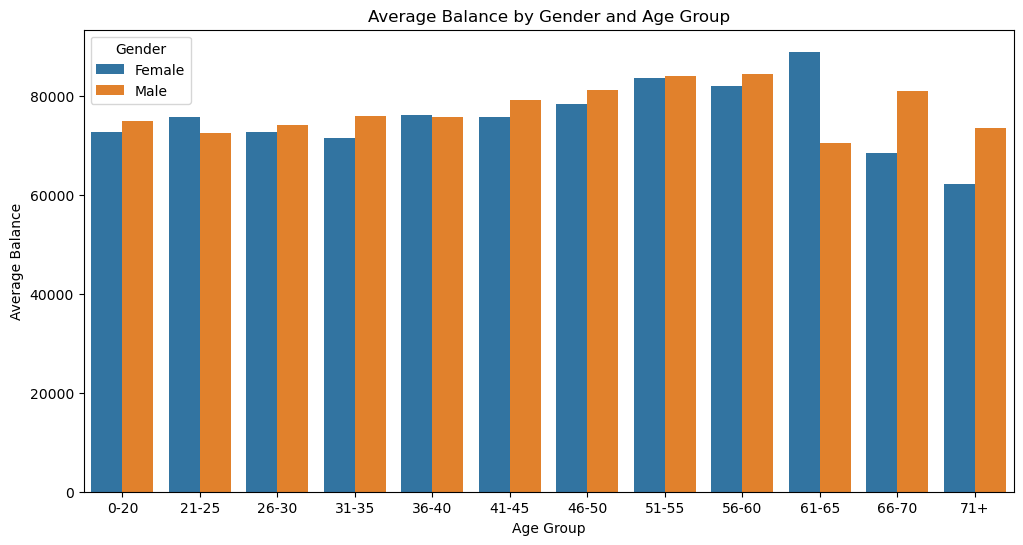

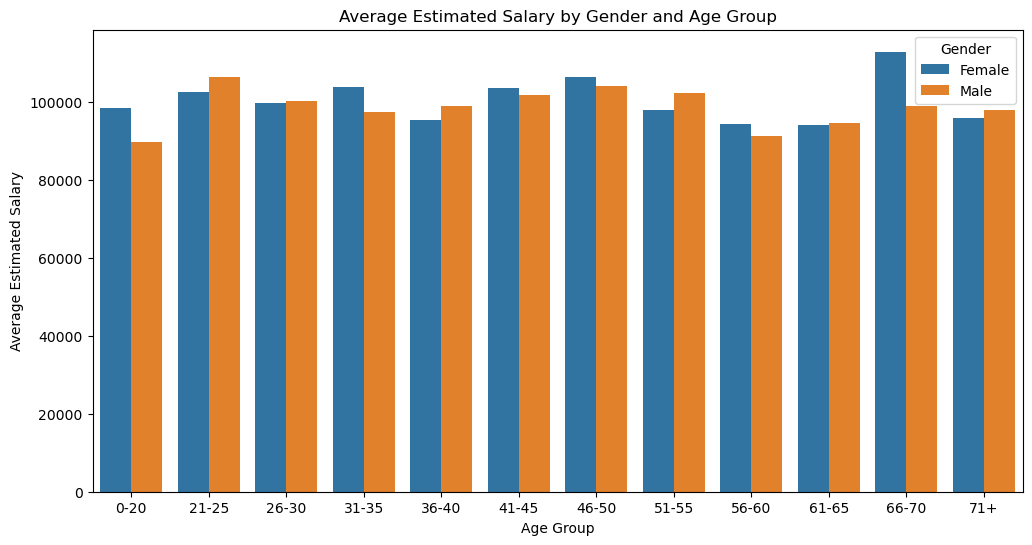

In [658]:
# Visualization

# Clustered bar chart for Balance by Gender and Age Group
plt.figure(figsize=(12, 6))
sb.barplot(data=demographic_analysis, x='Age Group', y='Balance', hue='Gender', ci=None)
plt.title('Average Balance by Gender and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Balance')
plt.legend(title='Gender')
plt.show()

# Clustered bar chart for Estimated Salary by Gender and Age Group
plt.figure(figsize=(12, 6))
sb.barplot(data=demographic_analysis, x='Age Group', y='EstimatedSalary', hue='Gender', ci=None)
plt.title('Average Estimated Salary by Gender and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Estimated Salary')
plt.legend(title='Gender')
plt.show()


- `Under 20 female customer has the least balance`

- `Male category exceeds the female gender across all age range in Balance`

- `The male gender in the under 20 agegroup has the least estimated Salary`

- `The male gender in the under 25 agegroup has the most estimated Salary`

- `There is a decrease in estimated salary from age 50 and above in the male and female gender, while in Balance the decline started from 60 above`

- `There is a peak in balance in the male in the age group 61-65`

- `In the estimated salary the female gender has more rise than the male`

Demography analysis of customer balance and estimated salary by gender and location

In [659]:
# Group by demographics (Gender and location) and calculate average Balance and EstimatedSalary
demography_analysis = data_df.groupby(['Gender','Location']).agg({
    'Balance': 'mean',
    'EstimatedSalary': 'mean'
})
# Display the result
demography_analysis


Balance  EstimatedSalary
Gender Location                                
Female France     60349.361606     99572.851743
       Germany   119127.339404    102448.319253
       Spain      59862.092534    100734.107475
Male   France     63546.284875    100174.252495
       Germany   120259.668222     99905.033959
       Spain      63311.852790     98424.458219

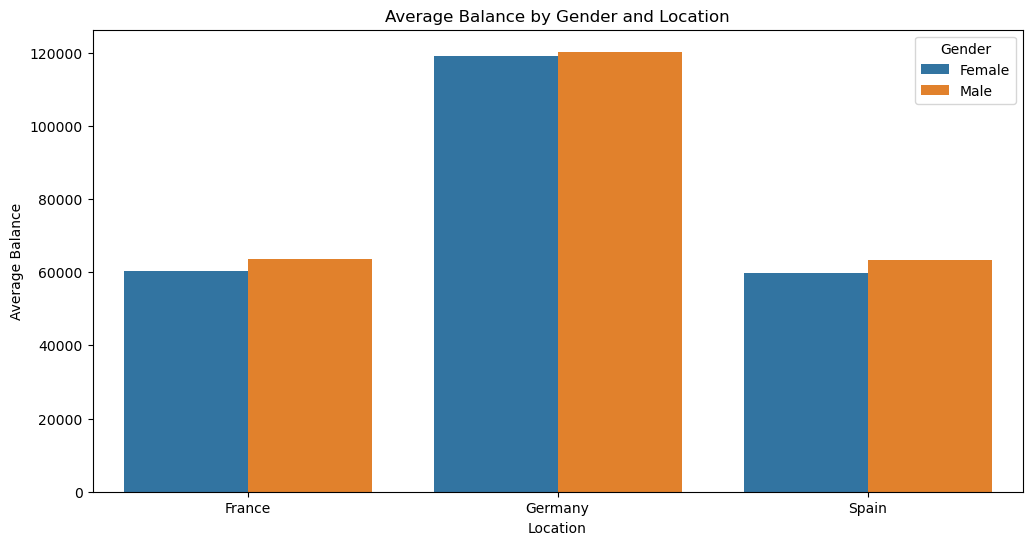

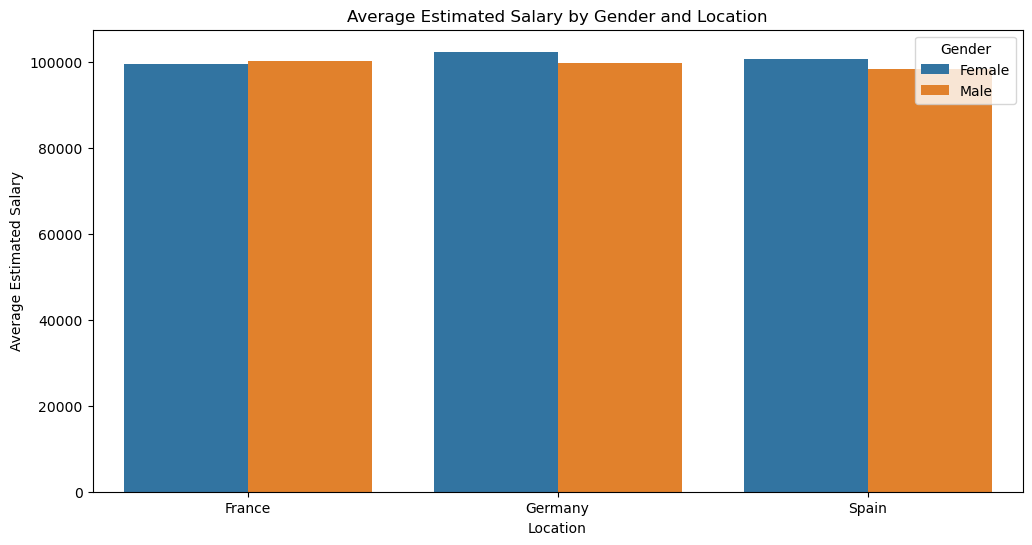

In [660]:

plt.figure(figsize=(12, 6))
sb.barplot(data=demography_analysis, x='Location', y='Balance', hue='Gender')
plt.title('Average Balance by Gender and Location')
plt.xlabel('Location')
plt.ylabel('Average Balance')
plt.legend(title='Gender')
plt.show()



plt.figure(figsize=(12, 6))
sb.barplot(data=demography_analysis, x='Location', y='EstimatedSalary', hue='Gender')
plt.title('Average Estimated Salary by Gender and Location')
plt.xlabel('Location')
plt.ylabel('Average Estimated Salary')
plt.legend(title='Gender')
plt.show()

### Exited Customers Analysis

Churn rate by tenure category

In [661]:
demo_churn_rates = data_df.groupby(['Age Group','Tenure_Category']).agg(Total_Customers=('CustomerId' , 'count'), 
                                     Exited_Customers=('Exited' , 'sum')).assign(churn_rate= lambda x: x['Exited_Customers'] / x['Total_Customers'])

demo_churn_rates

Total_Customers  Exited_Customers  \
Age Group Tenure_Category                                                  
0-20      Loyal Customers (6+ years)                17                 3   
          Moderate Tenure (2-6 years)               19                 0   
          New Customers (0-2 years)                 13                 0   
21-25     Loyal Customers (6+ years)               161                12   
          Moderate Tenure (2-6 years)              158                18   
          New Customers (0-2 years)                 89                 7   
26-30     Loyal Customers (6+ years)               428                28   
          Moderate Tenure (2-6 years)              489                44   
          New Customers (0-2 years)                267                12   
31-35     Loyal Customers (6+ years)               716                54   
          Moderate Tenure (2-6 years)              818                68   
          New Customers (0-2 years)                503                44   
36-40     Loyal Customers (6+ years)               798               110   
          Moderate Tenure (2-6 years)              910               115   
          New Customers (0-2 years)                599                82   
41-45     Loyal Customers (6+ years)               591               132   
          Moderate Tenure (2-6 years)              669               160   
          New Customers (0-2 years)                412               104   
46-50     Loyal Customers (6+ years)               326               134   
          Moderate Tenure (2-6 years)              361               163   
          New Customers (0-2 years)                258               113   
51-55     Loyal Customers (6+ years)               179                95   
          Moderate Tenure (2-6 years)              206               119   
          New Customers (0-2 years)                128                78   
56-60     Loyal Customers (6+ years)               131                70   
          Moderate Tenure (2-6 years)              137                75   
          New Customers (0-2 years)                 88                50   
61-65     Loyal Customers (6+ years)                86                36   
          Moderate Tenure (2-6 years)               90                40   
          New Customers (0-2 years)                 68                28   
66-70     Loyal Customers (6+ years)                47                 8   
          Moderate Tenure (2-6 years)               50                11   
          New Customers (0-2 years)                 34                 9   
71+       Loyal Customers (6+ years)                47                 6   
          Moderate Tenure (2-6 years)               68                 8   
          New Customers (0-2 years)                 36                 1   

                                       churn_rate  
Age Group Tenure_Category                          
0-20      Loyal Customers (6+ years)     0.176471  
          Moderate Tenure (2-6 years)    0.000000  
          New Customers (0-2 years)      0.000000  
21-25     Loyal Customers (6+ years)     0.074534  
          Moderate Tenure (2-6 years)    0.113924  
          New Customers (0-2 years)      0.078652  
26-30     Loyal Customers (6+ years)     0.065421  
          Moderate Tenure (2-6 years)    0.089980  
          New Customers (0-2 years)      0.044944  
31-35     Loyal Customers (6+ years)     0.075419  
          Moderate Tenure (2-6 years)    0.083130  
          New Customers (0-2 years)      0.087475  
36-40     Loyal Customers (6+ years)     0.137845  
          Moderate Tenure (2-6 years)    0.126374  
          New Customers (0-2 years)      0.136895  
41-45     Loyal Customers (6+ years)     0.223350  
          Moderate Tenure (2-6 years)    0.239163  
          New Customers (0-2 years)      0.252427  
46-50     Loyal Customers (6+ years)     0.411043  
          Moderate Tenure (2-6 years)    0.451524  
      

Churn Rate By Tenure Category

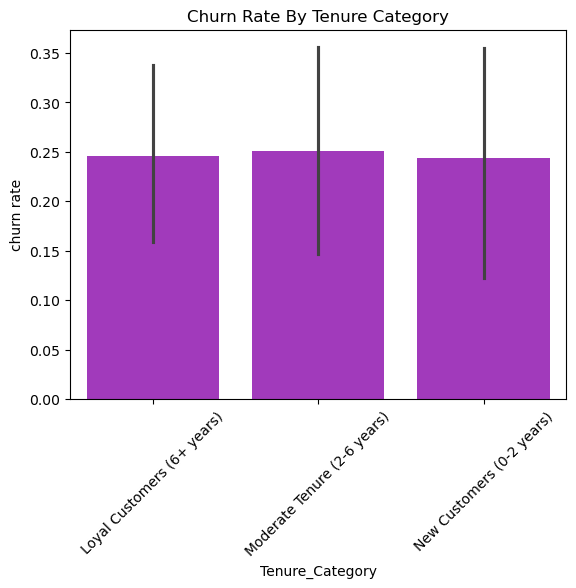

In [662]:
sb.barplot(x='Tenure_Category', y='churn_rate',color= '#ae24d1', data=demo_churn_rates.reset_index())
plt.title('Churn Rate By Tenure Category')
plt.xlabel('Tenure_Category')
plt.ylabel('churn rate')
plt.xticks(rotation=45)
plt.show()

- `The moderate tenure customers have a high churn rate`

Churn Rate By Age Group

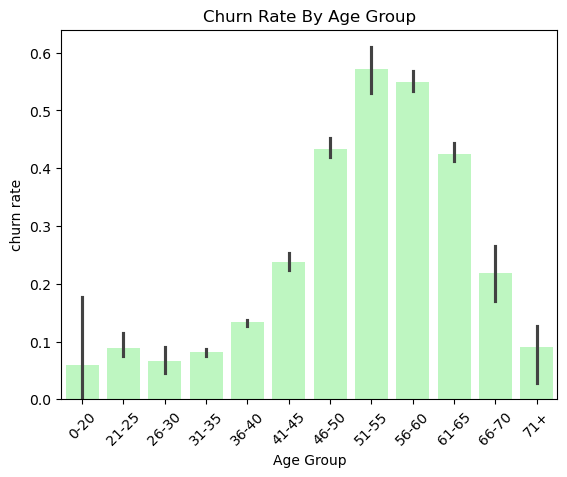

In [663]:
sb.barplot(x='Age Group', y='churn_rate',color= '#b5ffb9', data=demo_churn_rates.reset_index())
plt.title('Churn Rate By Age Group')
plt.xlabel('Age Group')
plt.ylabel('churn rate')
plt.xticks(rotation=45)
plt.show()

- `The age group < 20 customer has the lowest churn rate, suggesting that the younger customers are more likely to stay`
- `The age group above 51 exhibits high churn rate, indicating that cust in this demographic segmentation are leaving at a significantly higher rate than others. this counld suggest the bank lacks products fit for older customers`

In [664]:
demo_churn_rates = data_df.groupby(['Gender','Location']).agg(Total_Customers=('CustomerId' , 'count'), 
                                     Exited_Customers=('Exited' , 'sum')).assign(churn_rate= lambda x: x['Exited_Customers'] / x['Total_Customers'])

demo_churn_rates

Total_Customers  Exited_Customers  churn_rate
Gender Location                                               
Female France               2260               460    0.203540
       Germany              1192               448    0.375839
       Spain                1089               231    0.212121
Male   France               2753               350    0.127134
       Germany              1316               366    0.278116
       Spain                1387               182    0.131218

Churn Rate By Gender

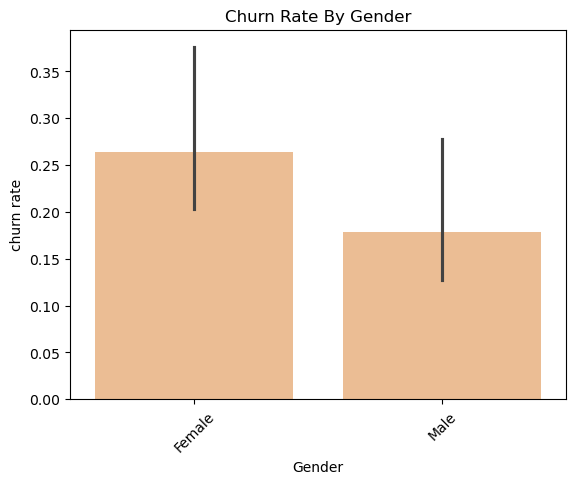

In [665]:
sb.barplot(x='Gender', y='churn_rate',color= '#f9bc86', data=demo_churn_rates.reset_index())
plt.title('Churn Rate By Gender')
plt.xlabel('Gender')
plt.ylabel('churn rate')
plt.xticks(rotation=45)
plt.show()

- `Female customers have higher churn rate than the male`

Churn Rate By Location

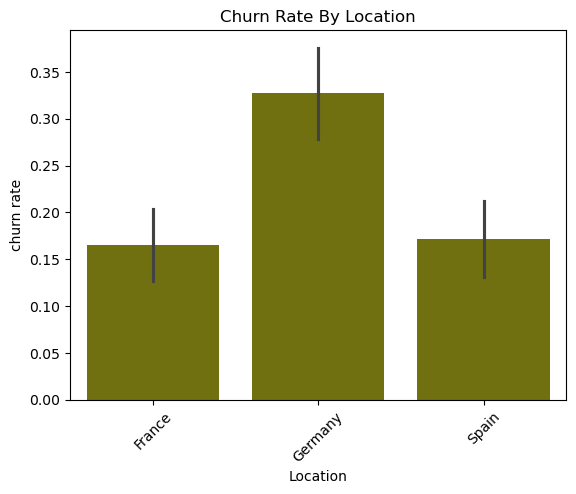

In [666]:
sb.barplot(x='Location', y='churn_rate',color= '#808000', data=demo_churn_rates.reset_index())
plt.title('Churn Rate By Location')
plt.xlabel('Location')
plt.ylabel('churn rate')
plt.xticks(rotation=45)
plt.show()

- `Germany has the highest churn rate across other locationa`

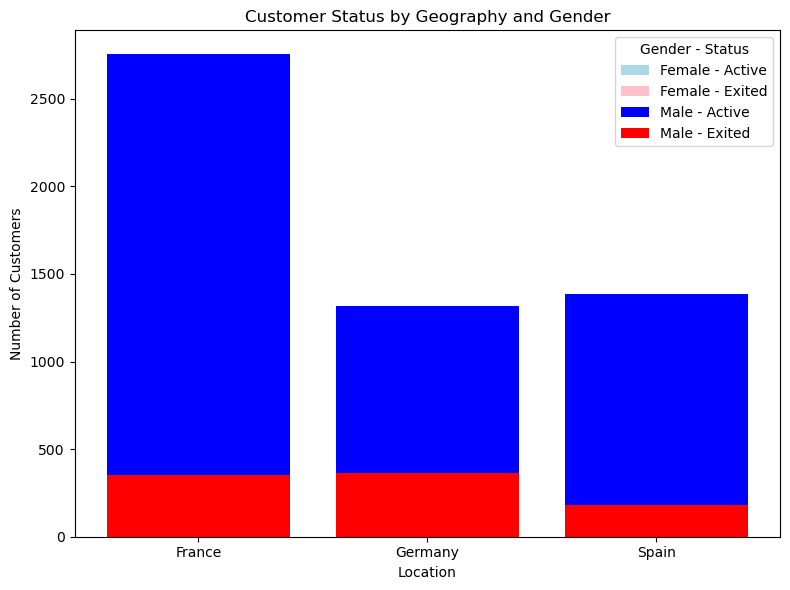

In [667]:

# Group by Geography, Gender, and Exited, then count
grouped = data_df.groupby(['Location', 'Gender', 'Exited']).size().reset_index(name='Count')

# Pivot table for plotting
pivot_table = grouped.pivot_table(index=['Location', 'Gender'], columns='Exited', values='Count', fill_value=0)
pivot_table.columns = ['Active', 'Exited']  # Rename columns
pivot_table = pivot_table.reset_index()

# Create the stacked bar plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot for each gender
for gender in pivot_table['Gender'].unique():
    subset = pivot_table[pivot_table['Gender'] == gender]
    ax.bar(
        subset['Location'],
        subset['Active'],
        label=f'{gender} - Active',
        color='blue' if gender == 'Male' else 'lightblue',
        bottom=subset['Exited']
    )
    ax.bar(
        subset['Location'],
        subset['Exited'],
        label=f'{gender} - Exited',
        color='red' if gender == 'Male' else 'pink'
    )

# Add labels and title
ax.set_xlabel('Location')
ax.set_ylabel('Number of Customers')
ax.set_title('Customer Status by Geography and Gender')
ax.legend(title='Gender - Status')
plt.tight_layout()
plt.show()


- `This plot shows that male are more active than the female customers`
- `France has a high active customers who are mostly male`
- `Spain has least exited customers`

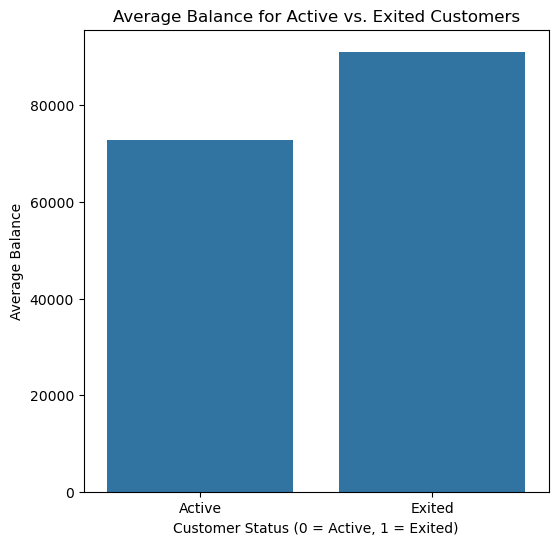

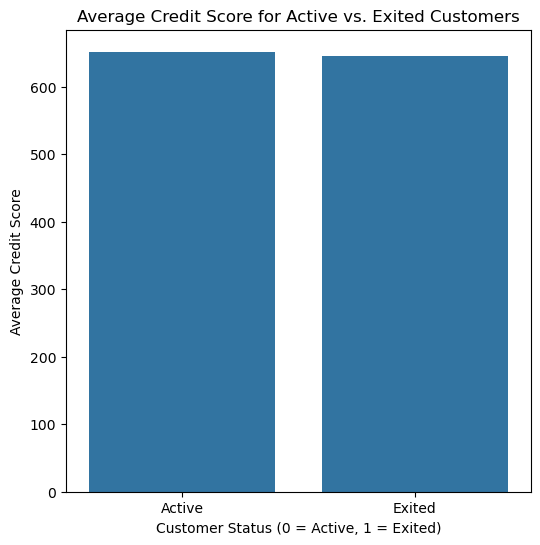

In [668]:

# Visualization

# Compare average Balance by Customer Status
plt.figure(figsize=(6, 6))
sb.barplot(data=data_df, x='Exited', y='Balance', ci=None)
plt.title('Average Balance for Active vs. Exited Customers')
plt.xlabel('Customer Status (0 = Active, 1 = Exited)')
plt.ylabel('Average Balance')
plt.xticks([0, 1], ['Active', 'Exited'])
plt.show()

# Compare average Credit Score by Customer Status
plt.figure(figsize=(6, 6))
sb.barplot(data=data_df, x='Exited', y='CreditScore', ci=None)
plt.title('Average Credit Score for Active vs. Exited Customers')
plt.xlabel('Customer Status (0 = Active, 1 = Exited)')
plt.ylabel('Average Credit Score')
plt.xticks([0, 1], ['Active', 'Exited'])
plt.show()


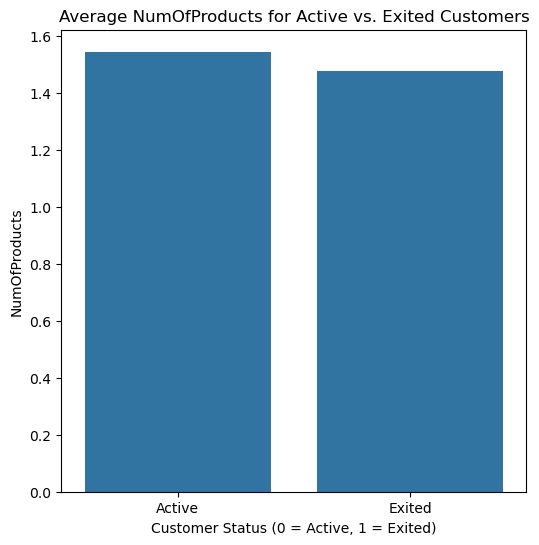

In [669]:
plt.figure(figsize=(6, 6))
sb.barplot(data=data_df, x='Exited', y='NumOfProducts', ci=None)
plt.title('Average NumOfProducts for Active vs. Exited Customers')
plt.xlabel('Customer Status (0 = Active, 1 = Exited)')
plt.ylabel('NumOfProducts')
plt.xticks([0, 1], ['Active', 'Exited'])
plt.show()

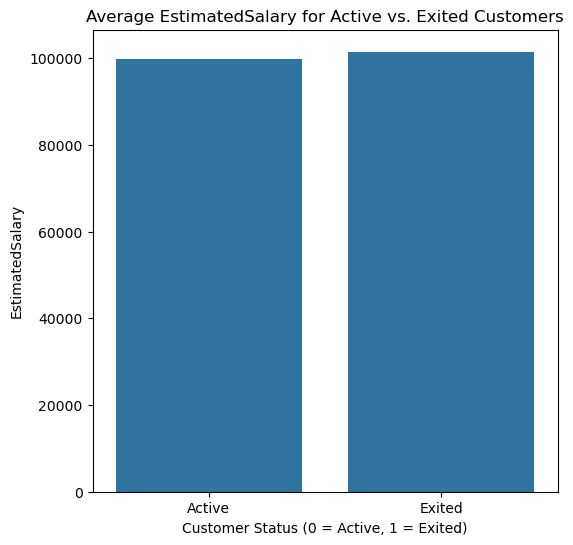

In [670]:
plt.figure(figsize=(6, 6))
sb.barplot(data=data_df, x='Exited', y='EstimatedSalary', ci=None)
plt.title('Average EstimatedSalary for Active vs. Exited Customers')
plt.xlabel('Customer Status (0 = Active, 1 = Exited)')
plt.ylabel('EstimatedSalary')
plt.xticks([0, 1], ['Active', 'Exited'])
plt.show()

#### Conclusions


Demographic Analysis

- France accounts for 50% of the bank's customer base, with a higher proportion of male customers.
- The predominant age range of customers is 21-50 years.
  
Credit Score Utilization

- Customers in France demonstrate higher credit scores compared to other regions.
- Younger customers (under 50 years) tend to have higher credit scores.
- Active customers are more likely to utilize their credit scores effectively.
  
Customer Tenure Insights

- Long-tenured customers (high tenure) tend to hold more products but show a decline in credit card usage.
- Long-tenured customers generally do not maintain high account balances, indicating a shift in banking needs or behavior.
  
Balance Distribution

- Few customers hold balances above 200,000, with only one customer exceeding 250,000.
- Female customers under 20 maintain the lowest balances.
- Across all age groups, male customers have higher balances than females.
-In the 61-65 age group, males exhibit a peak in account balances.

Estimated Salary Trends

- Males under 20 years have the lowest estimated salary, while those in the under-25 age group have the highest estimated salary.
- Both male and female customers show a decline in estimated salary from age 50 onward.
- In terms of growth, the female segment exhibits a greater increase in estimated salary compared to males.
  
Churn Analysis

- Moderate-tenure customers exhibit a high churn rate, suggesting dissatisfaction or unmet needs in this segment.
- The <20 age group has the lowest churn rate, indicating stronger retention among younger customers.
- Customers aged 51 and above exhibit a high churn rate, potentially highlighting gaps in products or services tailored to older demographics.
  
Customer Activity

- Male customers are generally more active than females.
- France has the highest number of active customers, primarily driven by male engagement.
- Spain has the lowest proportion of exited customers, indicating better customer retention in that region.
  
Recommendations:
Enhance product offerings for older customers to address their specific needs and reduce churn.
Leverage the insights on regional and demographic credit score utilization to design targeted financial products.
Develop strategies to engage female customers, particularly those under 20, with products that encourage higher balance retention.
Investigate the reasons for high churn among moderate-tenure customers and implement customer retention initiatives.


egies.